In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
def loadCSV(filename):
    file = filename
    if '.csv' not in filename:
        file += '.csv'
    data = pd.read_csv(file, encoding = 'ISO-8859-1')
    return data

In [27]:
csvFile = "processed_hate_speech"

In [28]:
data = loadCSV(csvFile)

In [29]:
data.head()

,tweet_text,confidence,tweet_class
0,warning penny boards will make you a faggot,0.6013,1
1,fuck dykes,0.7227,2
2,[@] [@] [@] [@] [@] at least i dont look like ...,0.5229,2
3,[@] [@] [@] is a fag jackie jealous neeeee,0.5184,2
4,[@] you heard me bitch but any way im back th ...,0.5185,1


In [30]:
data.tail()

,tweet_text,confidence,tweet_class
14504,im sorry did i offend your white supremacist a...,0.3418,0
14505,[@] caucasian euro aryan whatever really doesn...,0.6804,0
14506,[@] sir a patient named aryan khan village mee...,1.0000,0
14507,[@] happy birthday bro have an happy year ahead,1.0000,0
14508,[@] aryan kapoor is such a cute name tho d we...,1.0000,0


# Calculate Frequency of Unique Words by Class

In [31]:
def iterateFreq(dictionary, word):
    if dictionary.get(word, False):
        dictionary[word] += 1
    else:
        dictionary[word] = 1

In [32]:
def wordFrequencies(dataframe):
    all_tweets = {}
    neutral = {}
    offensive = {}
    hate = {}
    
    for index, row in dataframe.iterrows():
        tweet = row[0]
        tweet_class = row[2]
        
        tweet_words = tweet.split()
        
        for word in tweet_words:
            if tweet_class == 0:
                iterateFreq(neutral, word)
            elif tweet_class == 1:
                iterateFreq(offensive, word)
            elif tweet_class == 2:
                iterateFreq(hate, word)
                
            iterateFreq(all_tweets, word)
    
    return all_tweets, neutral, offensive, hate

In [33]:
def dispWordFreq(dictionary):
    unique_words = sorted( ((v,k) for k, v in dictionary.items()), reverse = True)
    for v, k in unique_words:
        word_val = "%s: %d" % (k, v)
        print(word_val)

In [34]:
all_wf, neutral_wf, offensive_wf, hate_wf = wordFrequencies(data)

In [37]:
all_wf_len = len(all_wf)
neutral_wf_len = len(neutral_wf)
offensive_wf_len = len(offensive_wf)
hate_wf_len = len(hate_wf)

In [40]:
all_wf_len, neutral_wf_len, offensive_wf_len, hate_wf_len

(17844, 13419, 7305, 4332)

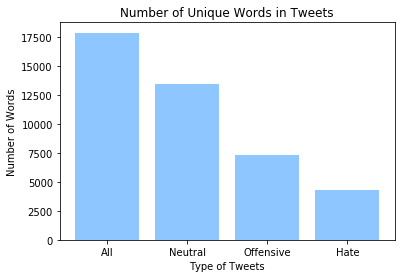

In [41]:
tweets = ('All', 'Neutral', 'Offensive', 'Hate')
y_pos = np.arange(len(tweets))
lengths = [all_wf_len, neutral_wf_len, offensive_wf_len, hate_wf_len]

plt.bar(y_pos, lengths, align='center', alpha=0.5, color='dodgerblue')
plt.xticks(y_pos, tweets)
plt.xlabel('Type of Tweets')
plt.ylabel('Number of Words')
plt.title('Number of Unique Words in Tweets')

plt.show()